# 1. Cargando Datos

In [1]:
import decision as decision
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import total as total

In [2]:
#Lectura de datos
train = pd.read_csv('./../data/train.csv')
test = pd.read_csv('./../data/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Exploracion de los datos

In [4]:
# Cuales son las columnas que manejan los datos
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Qué tamaño tienen los datos
train.shape

(891, 12)

Son 891 **filas** y 12 **columnas**

In [6]:
# ¿Tenemos valores nulos en los datos?
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Faltan datos en _Age_ que tiene **714**, en _Cabin_ que solamente tiene **204** y en _Embarked_ nos faltan **2** datos

In [7]:
# Como se distribuyen las variables numéricas
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Como se comportan las variables categóricas
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Aqui podemos denotar que mayormente habia **hombres** en el titanic y el embarque mas común era por **Southampton**

## 2.1 EDA: Estudio de variable target

In [9]:
train.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

Nos damos cuenta por el modelo que hay **549** personas que no sobrevivieron en el choque del titanic

In [10]:
# Target vs Sex
train.groupby(['Survived', 'Sex']).count()['PassengerId']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

Al momento de compararlos con los datos de la columna **Sex** podemos ver que de esas muertes **81** mujeres y **468** hombres,
probablemente porque las mujeres tenian una prioridad en los botes salvadidas, esto lo reflejamos ya que el resulatado
nos muestra que sobrevivieron **223** mujeres y **109** hombres

Con estos datos pudimos calcula que **74.20%** de mujeres sobrevivieron y que solamente el **18.89%** de hombres sobrevivieron

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


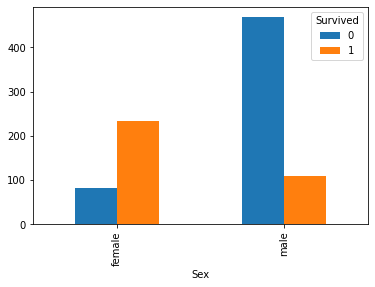

In [11]:
grouped_sex = train.groupby(['Survived', 'Sex']).count()['PassengerId']
print(grouped_sex)
(grouped_sex.unstack(level=0).plot.bar())
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


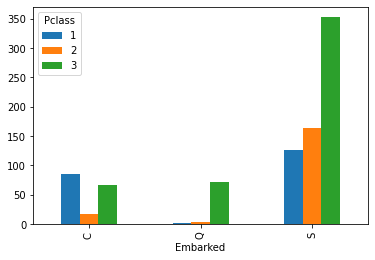

In [12]:
# Embarked vs Pclass
print(train.groupby(['Pclass', 'Embarked'])
      .count()['PassengerId']
      .unstack(level=0).plot.bar())

No se encontro una relación entre la clase de los pasajeros y embarque, mas
allá de que un mayor numero de personas se embarcaron en _Southampton_

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
Name: PassengerId, dtype: int64


<AxesSubplot:xlabel='Survived,Sex'>

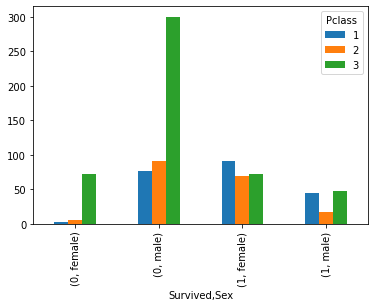

In [13]:
# Pclass vs Sex vs Survived
prueba = train.groupby(['Pclass', 'Survived', 'Sex']).count()['PassengerId']
print (prueba)
(prueba.unstack(level=0).plot(kind="bar"))

**De esta grafica se puede intuir que:**
- _Las personas mas pobres fueron donde mas fallecidos hubo accidente._
- _Se revalidan los datos de que las mujeres sobrevivieron mas que los hombres._
- _Había menos personas de clase 2 que cualquier otra._

# 3. Procesamiento de los datos

Seleccionamos las variables que queremos trabajar las cuales sérian:
- Survived
- Sex
- Age
- Pclass

In [14]:
datos = train[['Survived', 'Sex', 'Age', 'Pclass']]
datos.head(3)

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3


Estudiamos los datos nulos

In [15]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


Según lo mostrado, tenemos que mejorar las variables en _Age_ & _Sex_
- Hay datos faltantes en Age train['Age'].isna()
- La variable Sex aparece como object y la necesitamos numerica (int o float) para la solución de algoritmos

In [16]:
# Veamos como se distribuyen los datos nulos en edad
(train[train['Age'].isna()]
.groupby(['Sex', 'Pclass'])
.count()['PassengerId']
.unstack(level=0))

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


Esto nos muestra que hay mayor distribucción de datos nulos en la **tercera clase** de pasajeros y ya a considerar que los hombres
es donde es mas normal no escribir la edad.

In [17]:
(train[train['Age'].isna()]
      .groupby(['SibSp', 'Parch'])
      .count()['PassengerId']
      .unstack(level=0))

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


Un dato de interes es que las personas que viajaban solas no les interesaba poner su edad.

Interpretando las 2 ultimas tablas podemos intuir que las personas que viajaban mayormente
sola pertenencian a la tercera clase.

Apoyándonos en la interpretación anterior nos damos la idea de que se puede crear una variable
que indique si la personas viajaban solas o acompañadas

In [18]:
# Se calcula la mediana de Age para imputar
train['Age'].median()

28.0

In [19]:
# Ese resultado va insertarse para rellenar los nulos
train['Age'] = train['Age'].fillna(28.0)
datos = train[['Survived', 'Sex', 'Age', 'Pclass']]
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


Ahora solamente nos falta volver la variable _Sex_ int, ya que ya resolvimos el problema de datos nulos
en nuestro análisis

In [20]:
# map para label encoding
train['Sex'] = train['Sex'].map({'female': 1, 'male': 0}).astype(int)

Ya con la tabla preprocesada

In [21]:
datos.head(3)

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3


## 3.1 Crear nuevas variables

In [22]:
# Creamos la variable tipo flag "solo" para ver si solos pasajeros viajaban solos o acompañados
train['FlagSolo'] = np.where((
      train['SibSp'] == 0) & (train['Parch'] == 0), 1, 0)

Survived  FlagSolo
0         0           175
          1           374
1         0           179
          1           163
Name: PassengerId, dtype: int64


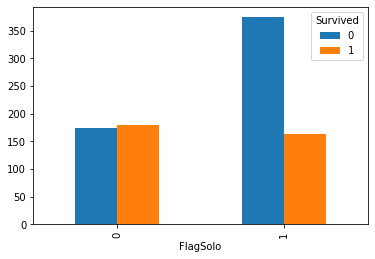

In [23]:
grouped_flag = train.groupby(['Survived', 'FlagSolo']).count()['PassengerId']
print(grouped_flag)
(grouped_flag.unstack(level=0).plot.bar())
plt.show()

Podemos destacar que para las personas que viajaban solas la supervivencia era similar, pero las personas que viajaban en conjunto tenian en conjunto tenian una probabilidad
mas alta de morir que una persona que viajaba en solitario.

In [24]:
train[['Survived', 'Sex', 'Age', 'Pclass', 'FlagSolo']].head(3)

,Survived,Sex,Age,Pclass,FlagSolo
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1


Con estos datos construiremos los modelos

In [25]:
# Variable dependiente
y_train = train['Survived']

# Variables independentes
datos = ['Sex', 'Age', 'Pclass', 'FlagSolo']
x_train = train[datos]

print(y_train.shape, x_train.shape)

(891,) (891, 4)


# 4. Modelos

Vamos a perfilar los modelos de prueba

- Regresión logistica
- Arboles de decision

In [26]:
# Entrenando modelo de regresión logistica
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [27]:
# Entrenando modelo de arboles de decision
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

# 5. Evaluación

Aquí vamos a hacer una matriz de confusion que nos permita evaluar que tan eficaz es cada modelo

In [28]:
from sklearn.metrics import plot_confusion_matrix

def conf_mat_acc(modelo):
      disp = plot_confusion_matrix(modelo, x_train, y_train,
                                   cmap= plt.cm.Blues, values_format = "d")
      true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
      total_data = np.sum(disp.confusion_matrix)
      accuracy = true_pred/total_data
      print('accuracy: ', np.round(accuracy, 2))
      plt.show()

accuracy:  0.79


C:\Users\sneyd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


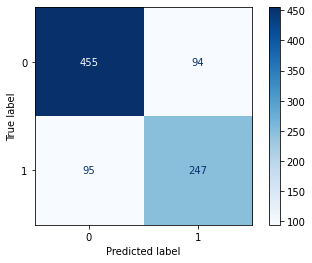

In [29]:
conf_mat_acc(logreg)

accuracy:  0.89


C:\Users\sneyd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


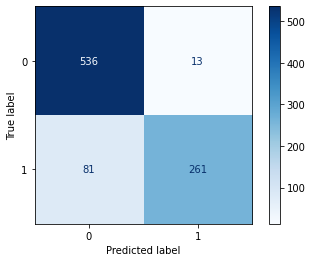

In [30]:
conf_mat_acc(decision_tree)

## 5.1 Evaluación sobre el test set

Antes hicimos la matriz de confusión sobre el train set. Esto no es del todo correcto porque estamos utilizando como validación los datos que usamos de entrenamiento. Por lo tanto, la estimación del error sería sesgada y tendría poca capacidad de generalización a casos que no haya "visto" el modelo. Por consecuente se necesita usar el **test**

In [31]:
# Ahora hay que preparar el test set para evalución
print(test.head(3))
test.info()

   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 no

In [32]:
# Preprocesamiento del test

# El mapeo a Sex
test['Sex'] = test['Sex'].map({'female': 1, 'male': 0}).astype(int)

# Completamos los datos nulos de Age
test['Age'] = test['Age'].fillna(28.0)

# Crear FlagSolo
test['FlagSolo'] = np.where((
      test['SibSp'] == 0) & (test['Parch'] == 0), 1, 0)

In [33]:
print(test.info())
test[datos].head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int32  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FlagSolo     418 non-null    int32  
dtypes: float64(2), int32(2), int64(4), object(4)
memory usage: 36.0+ KB
None


,Sex,Age,Pclass,FlagSolo
0,0,34.5,3,1
1,1,47.0,3,0
2,0,62.0,2,1


In [34]:
# Creacion del test set
x_test = test[datos]

print(x_test.shape)

(418, 4)


In [35]:
# Prediccion de Sobrevivientes
y_pred_log = logreg.predict(x_test)
y_pred_tree = decision_tree.predict(x_test)
print(y_pred_log[0:10])

[0 0 0 0 1 0 1 0 1 0]


Para tener una comprobación de los datos lo que hare es subir los datos a Kaggle para tener una verificación de estos

# 6. Predicción

In [36]:
# Prediciendo sobre el test set
print(y_pred_log[0:20])
print(y_pred_tree[0:20])

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0]
[0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0]


In [37]:
# Descarga de datos en formato .csv
def download(y_pred, name):
      output = pd.DataFrame({'PassengerId': test.PassengerId,
                             'Survived': y_pred})
      output.to_csv(name, index = False)

In [38]:
download(y_pred_log, '..\\resultados\\rafa_pred_log.csv')
download(y_pred_tree, '..\\resultados\\rafa_pred_tree.csv')

# 7. Resultado en Kaggle

![H](../resultados/Kaggle.jpg)

_Se obtuvo un acierto en la prediccion de los sobrevivientes del **0.753** con el **test** que es mejor a la que obtuvimos en el **train** que fue de **0.736**.
Debido a los resultados es mejor quedarse con el modelo de regresión logistica ya que hace una mejor interpretación de los datos._